In [1]:
import pandas as pd

In [2]:
#Loading data using pandas
f_data = pd.read_csv("Iris.csv")
f_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Sepal Width (cm)')

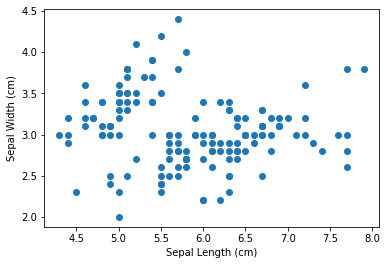

In [4]:
plt.scatter(f_data.SepalLengthCm,f_data.SepalWidthCm)
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")

In [5]:
from sklearn.cluster import KMeans

In [6]:
k_rng = range(1,10)
sse = [] #Sum of Squared Error
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(f_data[['SepalLengthCm','SepalWidthCm']])
    sse.append(km.inertia_)

In [7]:
sse

[130.18093333333334,
 57.98240604207882,
 37.1237021276596,
 27.962171178088646,
 20.949686646361823,
 17.223346336996332,
 14.628929179122284,
 12.764068676332748,
 11.284503968253976]

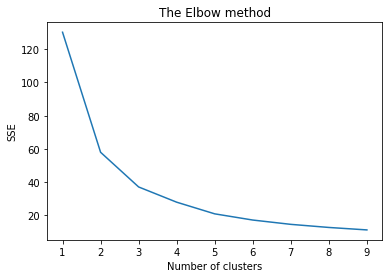

In [8]:
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.plot(k_rng,sse)

In [9]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [10]:
y_predicted = km.fit_predict(f_data[['SepalLengthCm','SepalWidthCm']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [11]:
f_data['cluster'] = y_predicted
f_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


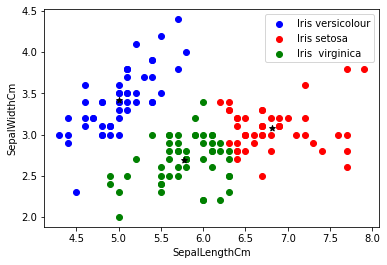

In [12]:
Iris1 = f_data[f_data.cluster==0]
Iris2 = f_data[f_data.cluster==1]
Iris3 = f_data[f_data.cluster==2]

plt.scatter(Iris1.SepalLengthCm,Iris1.SepalWidthCm,color='blue',label='Iris versicolour')
plt.scatter(Iris2.SepalLengthCm,Iris2.SepalWidthCm,color='red',label='Iris setosa')
plt.scatter(Iris3.SepalLengthCm,Iris3.SepalWidthCm,color='green',label='Iris  virginica')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*')

plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()
scaler.fit(f_data[['SepalWidthCm']])
f_data[['SepalWidthCm']] = scaler.transform(f_data[['SepalWidthCm']])

scaler.fit(f_data[['SepalLengthCm']])
f_data[['SepalLengthCm']] = scaler.transform(f_data[['SepalLengthCm']])

f_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,0.222222,0.625000,1.4,0.2,Iris-setosa,0
1,2,0.166667,0.416667,1.4,0.2,Iris-setosa,0
2,3,0.111111,0.500000,1.3,0.2,Iris-setosa,0
3,4,0.083333,0.458333,1.5,0.2,Iris-setosa,0
4,5,0.194444,0.666667,1.4,0.2,Iris-setosa,0


In [16]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(f_data[['SepalWidthCm','SepalLengthCm']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [18]:
f_data['cluster'] = y_predicted
f_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,0.222222,0.625000,1.4,0.2,Iris-setosa,0
1,2,0.166667,0.416667,1.4,0.2,Iris-setosa,0
2,3,0.111111,0.500000,1.3,0.2,Iris-setosa,0
3,4,0.083333,0.458333,1.5,0.2,Iris-setosa,0
4,5,0.194444,0.666667,1.4,0.2,Iris-setosa,0


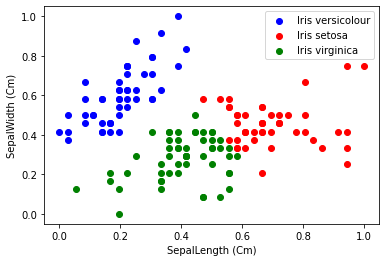

In [19]:
Iris1 = f_data[f_data.cluster==0]
Iris2 = f_data[f_data.cluster==1]
Iris3 = f_data[f_data.cluster==2]

plt.scatter(Iris1.SepalLengthCm,Iris1.SepalWidthCm,color='blue',label='Iris versicolour')
plt.scatter(Iris2.SepalLengthCm,Iris2.SepalWidthCm,color='red',label='Iris setosa')
plt.scatter(Iris3.SepalLengthCm,Iris3.SepalWidthCm,color='green',label='Iris virginica')


plt.xlabel('SepalLength (Cm)')
plt.ylabel('SepalWidth (Cm)')
plt.legend()